## One example for iris dataset

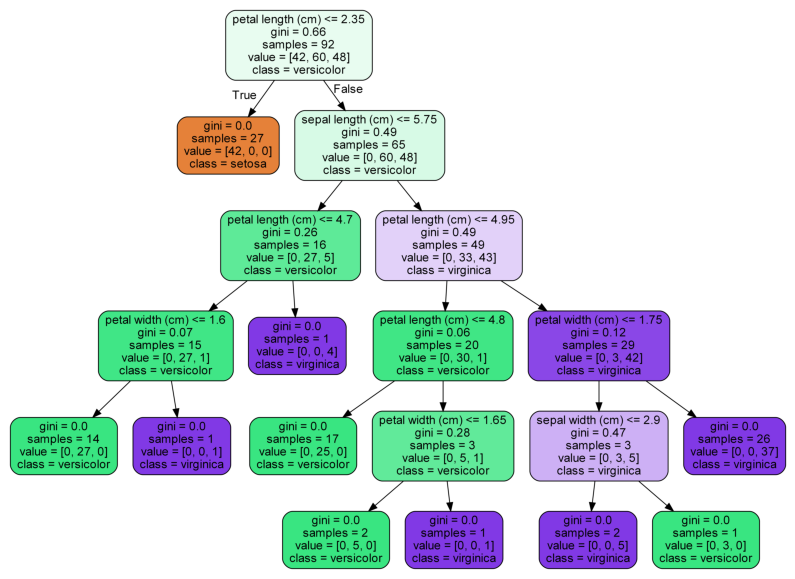

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()

## For your data

### Here is only an example

In [3]:
import pandas as pd
df = pd.read_csv('TRF2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
core_T2-FLAIR_wavelet-LL_glcm_JointEnergy                      188 non-null float64
core_CBV_logarithm_gldm_LargeDependenceLowGrayLevelEmphasis    166 non-null float64
core_CBV_squareroot_glszm_LargeAreaLowGrayLevelEmphasis        166 non-null float64
core_T2-FLAIR_wavelet-LL_glcm_SumEntropy                       188 non-null float64
edema_ADC_square_glcm_SumEntropy                               188 non-null float64
core_T1-MPRAGE_wavelet-HHL_glszm_LowGrayLevelZoneEmphasis      188 non-null float64
edema_CBV_square_firstorder_10Percentile                       166 non-null float64
edema_T1WI_squareroot_glcm_InverseVariance                     188 non-null float64
core_CBV_original_gldm_LargeDependenceLowGrayLevelEmphasis     166 non-null float64
core_T2WI_wavelet-HH_firstorder_Minimum                        188 non-null float64
Y                                                      

In [5]:
df_drop = df.dropna(axis=0)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 185
Data columns (total 11 columns):
core_T2-FLAIR_wavelet-LL_glcm_JointEnergy                      166 non-null float64
core_CBV_logarithm_gldm_LargeDependenceLowGrayLevelEmphasis    166 non-null float64
core_CBV_squareroot_glszm_LargeAreaLowGrayLevelEmphasis        166 non-null float64
core_T2-FLAIR_wavelet-LL_glcm_SumEntropy                       166 non-null float64
edema_ADC_square_glcm_SumEntropy                               166 non-null float64
core_T1-MPRAGE_wavelet-HHL_glszm_LowGrayLevelZoneEmphasis      166 non-null float64
edema_CBV_square_firstorder_10Percentile                       166 non-null float64
edema_T1WI_squareroot_glcm_InverseVariance                     166 non-null float64
core_CBV_original_gldm_LargeDependenceLowGrayLevelEmphasis     166 non-null float64
core_T2WI_wavelet-HH_firstorder_Minimum                        166 non-null float64
Y                                                      

In [6]:
import numpy as np
df_drop.replace([np.inf, -np.inf],np.nan,inplace=True)
df_drop.fillna(0,inplace=True)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 185
Data columns (total 11 columns):
core_T2-FLAIR_wavelet-LL_glcm_JointEnergy                      166 non-null float64
core_CBV_logarithm_gldm_LargeDependenceLowGrayLevelEmphasis    166 non-null float64
core_CBV_squareroot_glszm_LargeAreaLowGrayLevelEmphasis        166 non-null float64
core_T2-FLAIR_wavelet-LL_glcm_SumEntropy                       166 non-null float64
edema_ADC_square_glcm_SumEntropy                               166 non-null float64
core_T1-MPRAGE_wavelet-HHL_glszm_LowGrayLevelZoneEmphasis      166 non-null float64
edema_CBV_square_firstorder_10Percentile                       166 non-null float64
edema_T1WI_squareroot_glcm_InverseVariance                     166 non-null float64
core_CBV_original_gldm_LargeDependenceLowGrayLevelEmphasis     166 non-null float64
core_T2WI_wavelet-HH_firstorder_Minimum                        166 non-null float64
Y                                                      

D:\Python3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
D:\Python3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [7]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_drop['Y']))}
class_mapping

{'NS': 0, 'S': 1}

In [8]:
from sklearn.preprocessing import LabelEncoder
df_drop['Y'] = df_drop['Y'].map(class_mapping)
y = LabelEncoder().fit_transform(df_drop['Y'].values)
X = df_drop.iloc[:, 0:10].values
print(y.shape)
print(X.shape)

(166,)
(166, 10)


D:\Python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
feat_labels = df_drop.columns[0:10]

In [10]:
feat_labels

Index(['core_T2-FLAIR_wavelet-LL_glcm_JointEnergy',
       'core_CBV_logarithm_gldm_LargeDependenceLowGrayLevelEmphasis',
       'core_CBV_squareroot_glszm_LargeAreaLowGrayLevelEmphasis',
       'core_T2-FLAIR_wavelet-LL_glcm_SumEntropy',
       'edema_ADC_square_glcm_SumEntropy',
       'core_T1-MPRAGE_wavelet-HHL_glszm_LowGrayLevelZoneEmphasis',
       'edema_CBV_square_firstorder_10Percentile',
       'edema_T1WI_squareroot_glcm_InverseVariance',
       'core_CBV_original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'core_T2WI_wavelet-HH_firstorder_Minimum'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
print(X_std.shape)

(166, 10)


In [12]:
from sklearn.ensemble import RandomForestClassifier
# Limit max depth
model = RandomForestClassifier(max_depth = 5, n_estimators=10) # The parameters can be changed

# Train
model.fit(X_std, y)
# Extract single tree (using estimator_)
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=321547625, splitter='best')

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = feat_labels,
                #class_names = feat_y,
                rounded = True, proportion = False, precision = 2, filled = True)

In [14]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

In [15]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

## Use export_graphviz or pydotplus

### When you build one Decision Tree, it is really one tree; but the Random Forest model contains many trees.
### You can draw one of the them, or save all the trees.

In [ ]:
import pydotplus
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, min_samples_leaf=12, random_state=10)

# Train
model.fit(X_std, y)
Estimators = model.estimators_
for index, model in enumerate(Estimators):
    filename = 'data_' + str(index) + '.pdf'
    dot_data = tree.export_graphviz(model , out_file=None,
                         feature_names=feat_labels,
                         #class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    graph.write_pdf(filename)
# All the trees will be saved as pdf